## Implementation of a Shallow Neural Network in Keras using Moons dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import keras
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from keras import Input

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
plt.style.use('ggplot')

Using TensorFlow backend.


### Create an artificial dataset

In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# generate two datasets and print their shape
X,y = make_moons(n_samples = 6000, noise = 0.08)
print('X:\t{}' .format(X.shape))
print('y:\t{}' .format(y.shape))
print(type(X))
print(type(y))

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# shape of training and test set
print('X_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('X_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

X:	(6000, 2)
y:	(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train:	(4020, 2)
y_train:	(4020,)
X_test:		(1980, 2)
y_test:		(1980,)


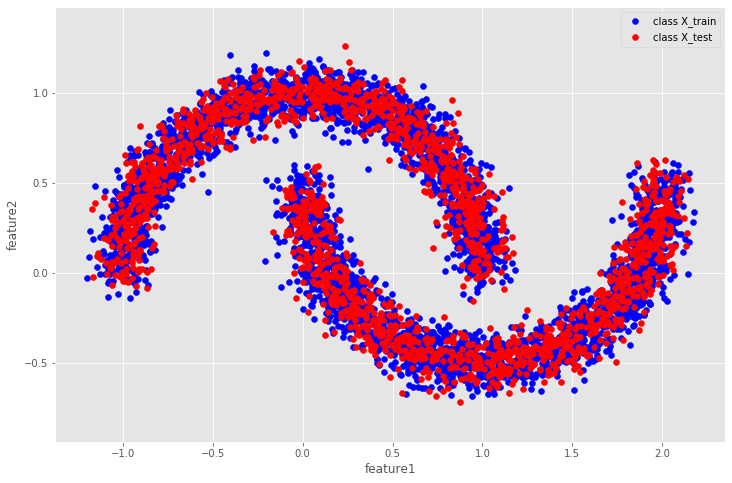

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()